## Population Growth Rate in Sub-Saharan Africa vs North America: Team Malthus

#### WB Data install

In [2]:
!pip install wbdata
import wbdata

# Return list of all country/region codes:
# wbdata.get_country()

# Return list matching a query term:
#wbdata.search_countries("World")



In [3]:
## Try your own search
wbdata.search_countries("")
wbdata.get_source()
SOURCE = 40 # "Population estimates and projections

#### Total Sub-Saharan Africa Population Over time

In [4]:
indicators = wbdata.get_indicator(source=SOURCE)
indicators
# Give variable for clarity
variable_labels = {"SP.POP.TOTL":"SSAfrica Population"}

SSafrica = wbdata.get_dataframe(variable_labels, country="SSF")

# Date index is of type string; change to integers
SSafrica.index = SSafrica.index.astype(int)

# Print a few years' data
SSafrica.head()

,SSAfrica Population
date,
2021,1.181163e+09
2020,1.151302e+09
2019,1.121549e+09
2018,1.092404e+09
2017,1.063885e+09


In [7]:
!pip install cufflinks # IF NECESSARY
import cufflinks as cf
cf.go_offline()

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning:

The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.



#### USA vs Sub-Saharan Africa Population Graph

#### Population Growth Graph

In [8]:

def fix_date_index(df):
    idx_vars = df.index.names
    new = df.reset_index()
    new.date = new.date.astype(int)
    return new.set_index(idx_vars)

from plotly.offline import init_notebook_mode, iplot
import numpy as np
from scipy.optimize import newton

init_notebook_mode(connected=True)

vars = {"SP.POP.TOTL":"Population, total"}


use=["NAC", "SSF"]

population = fix_date_index(wbdata.get_dataframe(vars,country=use)).squeeze().unstack('country','region')


population.iplot(xTitle="Year",yTitle="population",
              title="Population: USA vs. Sub-Saharan Africa")


#### Teacher Compentecy Level Graph

In [9]:
def fix_date_index(df):
    idx_vars = df.index.names
    new = df.reset_index()
    new.date = new.date.astype(int)
    return new.set_index(idx_vars)

from plotly.offline import init_notebook_mode, iplot
import numpy as np
from scipy.optimize import newton

init_notebook_mode(connected=True)

vars = {"SE.TER.ENRR.FE":"Population, total"}


use=["NAC", "SSF"]

population = fix_date_index(wbdata.get_dataframe(vars,country=use)).squeeze().unstack('country','region')


population.iplot(xTitle="Year",yTitle="Percent of Teachers",
              title="Teacher Compentecy Level: USA vs. Sub-Saharan Africa")

#### Adolescent Fertility Rate Graph

In [10]:
wbdata.get_indicator(topic=15)
vars = {"SP.ADO.TFRT":"Adolescent fertility rate"}


use=["USA", "SSF"]

fertility = fix_date_index(wbdata.get_dataframe(vars,country=use)).squeeze().unstack('country')



fertility.iplot(xTitle="Year",yTitle="births per 1,000 women ages 15-19",
              title="Adolescent Fertility Rate: USA vs. Sub-Saharan Africa")

#SSA vs. USA: Adolescent fertility rate (births per 1,000 women ages 15-19). FERTILITY Graph


#### Chart Comparing Female Teacher Abilities and Unemployment Rates

In [11]:
def pandas_df(region):
    df=wbdata.get_dataframe({'SP.POP.GROW': 'SSF Total Population growth',
                              'SP.DYN.TFRT.IN' :'Fertility rate, total (births per woman)',
                              'SE.SEC.TCAQ.FE.ZS':'Number of trained female teachers (% of female teachers)',
                            'SL.UEM.TOTL.FE.ZS':'Unemployment, female (% of female labor force)',
                            'SL.UEM.TOTL.MA.ZS':  'Unemployment, male (% of male labor force)'}, country=region)
    df.index = df.index.rename('year')
    df.index = df.index.astype(int)
    #df = df.drop([2021,2020]) #no data for teachers in SSF none 
    return df
pandas_df("SSF") #returns all years in data set
cleaned=pandas_df("SSF")
cleaned.head() 

,SSF Total Population growth,"Fertility rate, total (births per woman)",Number of trained female teachers (% of female teachers),"Unemployment, female (% of female labor force)","Unemployment, male (% of male labor force)"
year,,,,,
2021,2.593667,NaN,NaN,7.985011,7.300383
2020,2.652852,4.666825,NaN,7.481607,7.052058
2019,2.667977,4.734254,67.682381,6.823550,6.375952
2018,2.680619,4.787981,69.034492,6.856646,6.119354
2017,2.676170,4.840991,69.546707,6.984642,5.983844


#### Population Pyramid 

In [12]:
SOURCE = 40
indicators = wbdata.get_indicator(source=SOURCE)
indicators
age_ranges = []

# Ranges top out at 80, and go in five year increments
for i in range(0,80,5):
    age_ranges.append(f"{i:02d}"+f"{i+4:02d}")

age_ranges.append("80UP")

print(age_ranges)
#
male_variables = {"SP.POP."+age_range+".MA":"Males "+age_range for age_range in age_ranges}
female_variables = {"SP.POP."+age_range+".FE":"Females "+age_range for age_range in age_ranges}

variables = male_variables
variables.update(female_variables)

df = wbdata.get_dataframe(variables,country="NAC")
#
import plotly.offline as py
import plotly.graph_objs as go
import pandas as pd
import numpy as np

py.init_notebook_mode(connected=True)

layout = go.Layout(barmode='overlay',
                   yaxis=go.layout.YAxis(range=[0, 90], title='Age'),
                   xaxis=go.layout.XAxis(title='Number'))

year = 2021

bins = [go.Bar(x = df.loc[str(year),:].filter(regex="Male").values,
               y = [int(s[:2])+1 for s in age_ranges],
               orientation='h',
               name='Men',
               marker=dict(color='yellow'),
               hoverinfo='skip'
               ),

        go.Bar(x = -df.loc[str(year),:].filter(regex="Female").values,
               y=[int(s[:2])+1 for s in age_ranges],
               orientation='h',
               name='Women',
               marker=dict(color='red'),
               hoverinfo='skip',
               )
        ]
py.iplot(dict(data=bins, layout=layout))

['0004', '0509', '1014', '1519', '2024', '2529', '3034', '3539', '4044', '4549', '5054', '5559', '6064', '6569', '7074', '7579', '80UP']


In [13]:
import geopandas
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
africa_population=pd.read_csv('africa-population 2.csv')
north_america=pd.read_csv('north-america-population 2.csv')

In [15]:
print(africa_population)
print(north_america)

           date   Population   Annual % Change
0    1950/12/31    227549258               NaN
1    1951/12/31    232483995              2.17
2    1952/12/31    237586060              2.19
3    1953/12/31    242837448              2.21
4    1954/12/31    248244771              2.23
..          ...          ...               ...
146  2096/12/31   3860723993              0.46
147  2097/12/31   3877576535              0.44
148  2098/12/31   3893797579              0.42
149  2099/12/31   3909421429              0.40
150  2100/12/31   3924420614              0.38

[151 rows x 3 columns]
           date   Population   Annual % Change
0    1950/12/31    162089353               NaN
1    1951/12/31    164749833              1.64
2    1952/12/31    167494177              1.67
3    1953/12/31    170420514              1.75
4    1954/12/31    173598022              1.86
..          ...          ...               ...
146  2096/12/31    447031086              0.06
147  2097/12/31    447294621        

In [16]:
africa_population['continent']='Africa'
north_america['continent']='North America'
#New column of continent values
population=pd.concat([africa_population,north_america],axis=0)
## Merge two demographics
population['date']=pd.to_datetime(population['date'])
#Set the date column to time format
population['year']=population['date'].dt.year
#Figure out the year

In [17]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
#Get global map data
world=world[world.continent.isin(['Africa','North America'])]
# Keep only two regions

In [18]:
def plot(year,cmap):
# Define function to take 2 arguments integer year string cmap
    fig,ax=plt.subplots(figsize=[10,6])
    # New Canvas Size 10,6
    world.merge(population.query('year=={}'.format(year)),on='continent').plot(# Merge world and population data by continent
        column=' Population',# population is displayed
        legend=True,ax=ax,cmap=cmap)# Color bar display will draw the image on the canvas just filled with color code
    plt.title('Population of Africa and North America in {}'.format(year))# Picture title
    plt.show()

#### Population Map

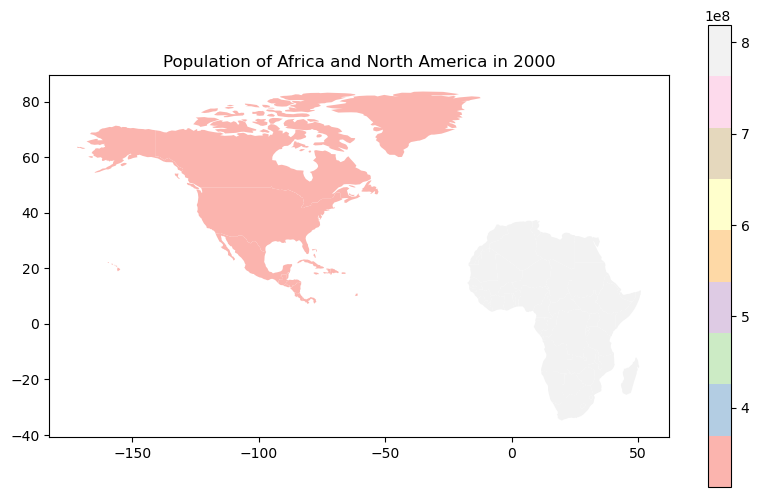

In [19]:
 plot(2000,'Pastel1') # Call the function defined earlier

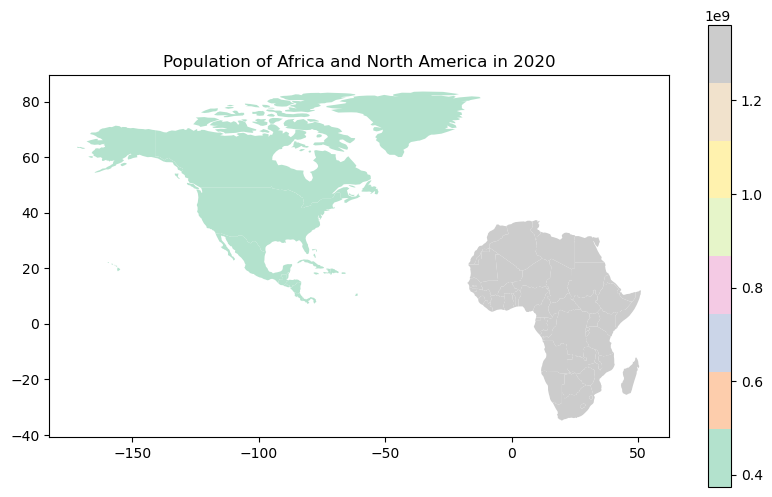

In [17]:
plot(2020,'Pastel2')

In [20]:
 import plotly.express as px

#### Population Growth Projection

In [21]:
 px.scatter(population, x=" Population", y=" Population",
        animation_frame="year",
        animation_group="continent",
        color="continent",
        size=" Population",
        hover_name="continent",
        range_x=[8000000,5000000000],
        range_y=[8000000,5000000000],
        log_x=True,
        title='Africa Vs North America'
          )